# Q2.a) b)

In [3]:
import numpy as np
x = np.array([1, 2, 3, 5])
h1 = np.array([0.5, 0.5])
h2 = np.array([0.5, -0.5])

In [4]:
y_conv = np.convolve(x, h1, mode='full')
y_corr = np.correlate(x, h1, mode='full')
sum_y_h1 = np.sum(y_conv)
print("Convolution (h1):", y_conv)
print("Correlation (h1):", y_corr)
print("Sum for h1:", sum_y_h1)

Convolution (h1): [0.5 1.5 2.5 4.  2.5]
Correlation (h1): [0.5 1.5 2.5 4.  2.5]
Sum for h1: 11.0


In [5]:
sum_y_h2 = np.sum(np.convolve(x, h2, mode='full'))
y_conv = np.convolve(x, h2, mode='full')
print("\nConvolution (h2):", y_conv)
print("Sum for h2:", np.sum(y_conv))


Convolution (h2): [ 0.5  0.5  0.5  1.  -2.5]
Sum for h2: 0.0


# Q3.a) b)

In [6]:
import numpy as np
from scipy.ndimage import convolve
original_image = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
kernel_sum_to_1 = (1/9)*np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
kernel_sum_to_0 = np.array([[1, -1, 1], [1, -1, 1], [1, -1, 1]])
filtered_image_1 = convolve(original_image, kernel_sum_to_1, mode='constant', cval=0.0)
filtered_image_0 = convolve(original_image, kernel_sum_to_0, mode='constant', cval=0.0)
print("Original Image:")
print(original_image)
print("\nSmoothing Kernel:")
print(kernel_sum_to_1)
print("\nSharpening Kernel:")
print(kernel_sum_to_0)
print("\nFiltered Image (Kernel Coefficients Sum to 1):")
print(filtered_image_1)
print("\nFiltered Image (Kernel Coefficients Sum to 0):")
print(filtered_image_0)

Original Image:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Smoothing Kernel:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

Sharpening Kernel:
[[ 1 -1  1]
 [ 1 -1  1]
 [ 1 -1  1]]

Filtered Image (Kernel Coefficients Sum to 1):
[[1 2 1]
 [2 5 3]
 [2 4 3]]

Filtered Image (Kernel Coefficients Sum to 0):
[[ 2  7 -2]
 [ 3 15 -3]
 [ 2 13 -2]]


# Q4. a)

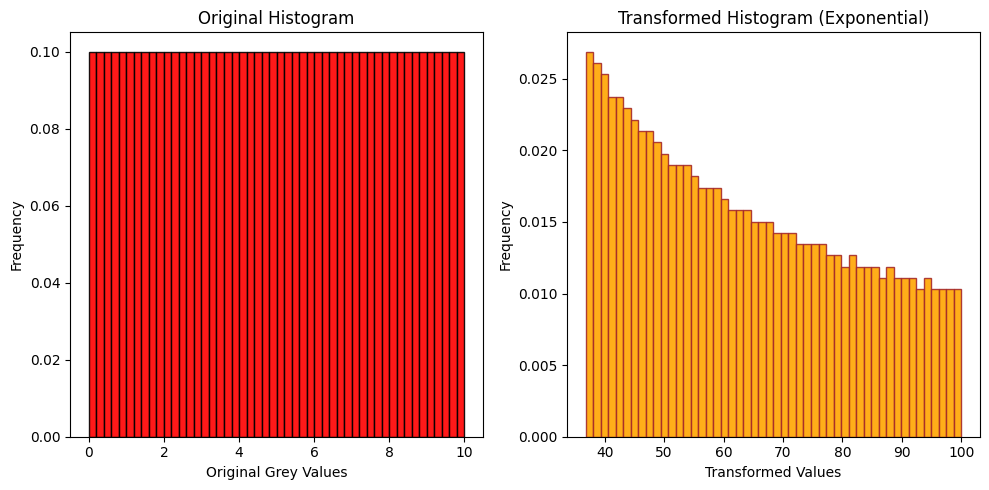

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_transform(original_values, Tmax):
    B = 1 / 10
    A = Tmax / np.exp(1)
    transformed_values = A * np.exp(B * original_values)
    return transformed_values

original_values = np.linspace(0, 10, 1000)

Tmax = 100

transformed_values = exponential_transform(original_values, Tmax)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(original_values, bins=50, density=True, edgecolor='black', alpha=0.9,color="red")
plt.title('Original Histogram')
plt.xlabel('Original Grey Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(transformed_values, bins=50, density=True, edgecolor='brown', alpha=0.9,color="orange")
plt.title('Transformed Histogram (Exponential)')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## b)

In [14]:
box_filter_kernel = np.ones((3, 3)) / 9

original_image = np.array([
    [2, 5, 4, 3, 7],
    [0, 7, 2, 1, 1],
    [3, 0, 0, 1, 1],
    [2, 3, 2, 4, 6],
    [1, 2, 2, 4, 0]
])

def apply_box_filter(image, filter_kernel):
    return np.sum(image * filter_kernel)

center_pixel_index = (len(original_image) // 2, len(original_image[0]) // 2)

neighborhood = original_image[center_pixel_index[0] - 1:center_pixel_index[0] + 2,
                              center_pixel_index[1] - 1:center_pixel_index[1] + 2]

filtered_output_center_pixel = apply_box_filter(neighborhood, box_filter_kernel)

print("Original Image:")
print(original_image)
print("\nFiltered Output Corresponding to Center Pixel:")
print(filtered_output_center_pixel)

Original Image:
[[2 5 4 3 7]
 [0 7 2 1 1]
 [3 0 0 1 1]
 [2 3 2 4 6]
 [1 2 2 4 0]]

Filtered Output Corresponding to Center Pixel:
2.2222222222222223


# Q5. a)

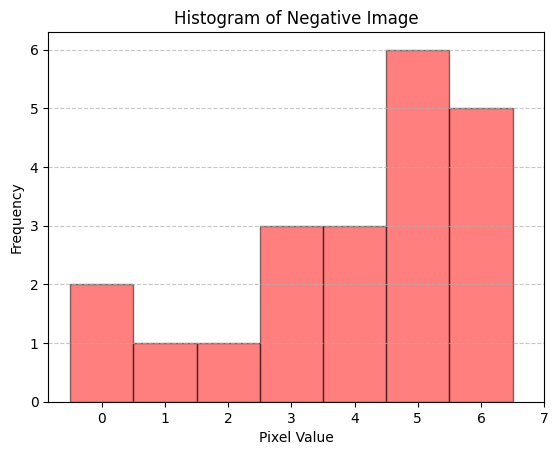

In [15]:
import numpy as np
import matplotlib.pyplot as plt

original_image = np.array([
    [2, 5, 4, 3, 7],
    [0, 7, 2, 1, 1],
    [3, 0, 0, 1, 1],
    [2, 3, 2, 4, 6],
    [1, 2, 2, 4, 0]
])

negative_image = 7 - original_image
negative_values = negative_image.flatten()

plt.hist(negative_values, bins=np.arange(0, 8) - 0.5, edgecolor='black', alpha=0.5,color="red")
plt.title('Histogram of Negative Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xticks(range(8))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## (b)

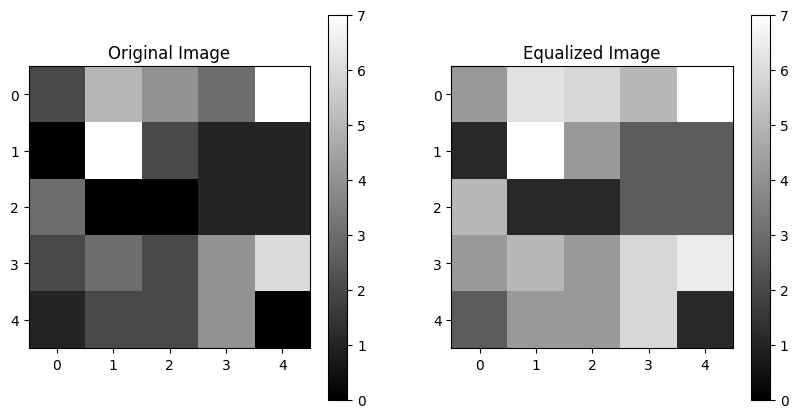

In [18]:
import numpy as np
import matplotlib.pyplot as plt

original_image = np.array([
    [2, 5, 4, 3, 7],
    [0, 7, 2, 1, 1],
    [3, 0, 0, 1, 1],
    [2, 3, 2, 4, 6],
    [1, 2, 2, 4, 0]
])

hist, bins = np.histogram(original_image.flatten(), bins=np.arange(0, 9), density=True)
cdf = hist.cumsum()

equalized_image = np.interp(original_image.flatten(), bins[:-1], cdf * 7).reshape(original_image.shape)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray', vmin=0, vmax=7)
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=7)
plt.title('Equalized Image')
plt.colorbar()

plt.show()
